Lecture 1.0

In [1]:
from qiskit import QuantumCircuit, QuantumRegister

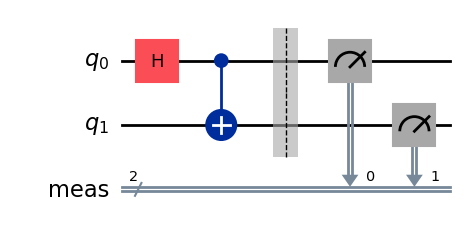

In [2]:
qubits = QuantumRegister(2, name='q')
circuit = QuantumCircuit(qubits)

q0,q1 = qubits
circuit.h(q0)
circuit.cx(q0, q1)
circuit.measure_all()

circuit.draw("mpl")


In [3]:
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


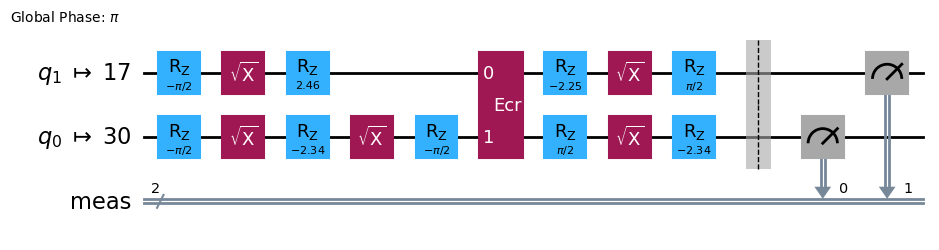

In [4]:
backend = FakeBrisbane()
pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pass_manager.run(circuit)

isa_circuit.draw("mpl", idle_wires=False)


In [5]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [6]:
options = {"simulator":{"seed_simulator":42}}
sampler = Sampler(backend, options=options)

job = sampler.run([isa_circuit])
result = job.result()

In [7]:
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=1024, num_bits=2>)))], metadata={})


In [8]:
from qiskit.visualizations import plot_histogram
result.plot_histogram()

ModuleNotFoundError: No module named 'qiskit.visualizations'